# Regression Boston Housing dataset 

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston_data = load_boston()

In [3]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
N, D = boston_data.data.shape
print("Number of samples: ", N)
print("Number of features: ", D)

Number of samples:  506
Number of features:  13


In [5]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd
bos = pd.DataFrame(boston_data.data)

In [8]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos.columns = boston_data.feature_names

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bos['price'] = boston_data.target

In [12]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data preprocessing

In [13]:
# Load packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
import numpy as np
X = np.array(boston_data.data)
X = scaler.fit_transform(X)

In [15]:
Y = np.array(boston_data.target)
Y = Y.reshape(-1, 1)

##### Split the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(354, 13) (152, 13) (354, 1) (152, 1)


## Data Loading

### If the dataloader is already defined for standard dataset, use them

In [19]:
import torch
from torchvision import datasets, transforms
train_loader = torch.utils.data.DataLoader(
                datasets.MNIST("../data", train=True, download=True,
                              transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081))
                              ])),
                batch_size=32, shuffle=True)

In [20]:
train_loader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=0.3081)
           )

### Custom DataLoader 

## Three steps
1. Define initialization method (\_\_init\_\_)
2. Define length method (\_\_len\_\_)
3. Define method to return one item on the index (\_\_getitem\_\_)

In [22]:
from torch.utils.data import Dataset

class RegressionDataset(Dataset):
    def __init__(self, data, output):
        self.data = data
        self.output = output

    def __len__(self):
        return len(self.data)

    def __getitem__(self, ind):
        return self.data[ind], self.output[ind]

In [23]:
train_dataset = RegressionDataset(X_train, Y_train)
test_dataset = RegressionDataset(X_test, Y_test)

In [24]:
from torch.utils.data import DataLoader

In [25]:
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50)

# Define Model

In [26]:
from torch import nn
from torch.nn import functional as F

In [41]:
class RegressionModel(nn.Module):
    def __init__(self, feature_dim, hidden_dim, output_dim):
        super(RegressionModel, self).__init__()
        
        self.hidden = nn.Linear(feature_dim, hidden_dim)
        self.predict = nn.Linear(hidden_dim, output_dim)
        self.drop1  = nn.Dropout(0.7)
    
        self.drop2  = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.drop1(F.elu(self.hidden(x)))
        x = self.drop2(self.predict(x))
        return x

In [42]:
model = RegressionModel(D, 50, 1)

In [43]:
print(model)

RegressionModel(
  (hidden): Linear(in_features=13, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)


In [ ]:
from draw_neural_net import draw_neural_net
from matplotlib import pyplot as plt
%matplotlib inline

# Training Strategy

- We need Loss function to compute the prediction error
- and an optimization function to update the parameter

##### Let's define values to setup training process

In [30]:
num_epochs = 100 
lr = 0.01

In [31]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.00001)

In [32]:
from tqdm import trange

In [33]:
# Training loop
losses = []
epochs = trange(num_epochs, desc="Training Loss")
for epoch in epochs:
    running_loss = 0
    for data in train_loader:
        # get the data
        inputs, outputs = data
        inputs = inputs.type(torch.FloatTensor)
        outputs = outputs.type(torch.FloatTensor)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass: Calculate predicted price by passing x to the model
        y_pred = model(inputs)
        
        # compute loss
        loss = criterion(y_pred, outputs)
        running_loss += loss.item()
        # perform backward pass and update the parameters
        loss.backward()
        optimizer.step()
    
    epoch_loss = round(running_loss/len(train_loader.dataset), 4)
    epochs.set_description("Training_loss: %g" % epoch_loss)
    losses.append(epoch_loss)

Training_loss: 7.7375: 100%|██████████| 100/100 [00:01<00:00, 58.86it/s]


In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

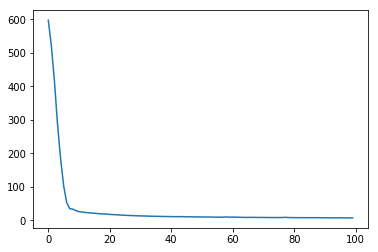

In [35]:
plt.plot(losses)
plt.show()

#### Evaluate the model

In [38]:
with torch.no_grad():
    model.eval()
    
    preds = []
    for data in test_loader:
        # get the data
        inputs, outputs = data
        inputs = inputs.type(torch.FloatTensor)
        outputs = outputs.type(torch.FloatTensor)
        
        pred = model(inputs)
        preds.append(pred.numpy())

    prediction = np.concatenate(preds)

In [39]:
from sklearn.metrics import r2_score
print(r2_score(prediction, Y_test))

0.8095080695164322


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

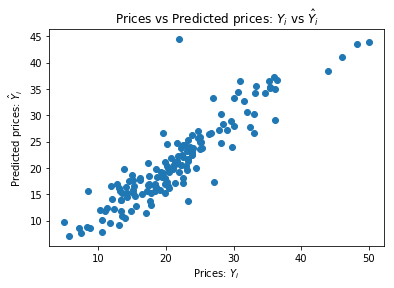

In [40]:
plt.scatter(Y_test, prediction)
plt.xlabel("Prices: $Y_i$")
plt.ylabel(r"Predicted prices: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")